# Teddy Mutiga_ Good Cardio Project

# Loading the libraries

In [1]:
import pandas as pd  #To read csv and work on DataFrames
import numpy as np  #for calculations
import matplotlib.pyplot as plt  # To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns # For more colorful plots

# Reading and making a copy of the data

In [2]:
data = pd.read_csv("CardioGoodFitness.csv")
cardgood = data.copy()
cardgood.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


# Overview of the data

In [3]:
cardgood.shape
# checking the number of rows and columns.


(180, 9)

The dataset has 180 rows and 9 columns

In [4]:
cardgood.info()   # checking the type of data in the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
cardgood["Product"].value_counts()  #check the number of models in the dataset.

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

OBSERVATIONS
- The dataframe does not have any missing values
- Marital status and Gender are both object datatypes. They should be categorical.
- There are 3 different product models.

FIXING THE DATA TYPES

In [6]:
cardgood["Gender"] = cardgood.Gender.astype("category")
cardgood["MaritalStatus"] = cardgood.MaritalStatus.astype("category")

cardgood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    object  
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(2), int64(6), object(1)
memory usage: 10.5+ KB


- Gender and Marital status now categorical variables.

In [7]:
cardgood.isna().sum() #confirming that there are no missing values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

A GENERAL SUMMARY OF THE DATA SET


In [8]:
cardgood.describe()   # This gives the count, mean, standard deviation, minimum, maximum and quartile values of all the columns.

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# Exploratory Data Analysis

In the summary above, one can see the mean value, but to see it isoloted, one could run the code below:

In [9]:
cardgood.mean()  #Shows the average in each column.

Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64

To get the mode:

In [10]:
cardgood.mode() #shows the most frequently occuring value in each column.

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,25,Male,16,Partnered,3,3,45480,85


to get the median:

In [11]:
cardgood.median() #shows the value at the middle of the column, when the values are arranged either in ascending or descending order

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64

MEASURES OF DISPERSION

In [12]:
cardgood.quantile(0.75) - cardgood.quantile(0.25)  #gives the Interquartile range for all the columns

Age              9.00
Education        2.00
Usage            1.00
Fitness          1.00
Income       14609.25
Miles           48.75
dtype: float64

In [13]:
cardgood.var() #indicates how disperse the data is.

Age          4.821217e+01
Education    2.614867e+00
Usage        1.176785e+00
Fitness      9.194289e-01
Income       2.724706e+08
Miles        2.689833e+03
dtype: float64

In [14]:
cardgood.std() #to isolate the standard deviation of the values in the dataset

Age              6.943498
Education        1.617055
Usage            1.084797
Fitness          0.958869
Income       16506.684226
Miles           51.863605
dtype: float64

NOW THAT THE MEASURES OF CENTRAL TENDENCY AND DISPERSION ARE CLEAR, ONE CAN NOW VISUALIZE THE DATA TO CHECK FOR OUTLIERS

I) Numerical values

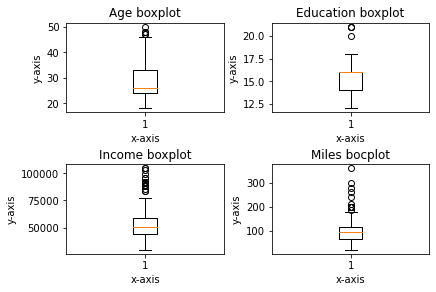

In [15]:
# numerical values are needed in this case. 
plt.subplot(2,2,1)              #indicates the shape shape of the subplots. 2 rows and 2 columns in this case.
plt.boxplot(cardgood["Age"])
plt.title("Age boxplot")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.subplot(2,2,2)
plt.boxplot(cardgood["Education"])
plt.title("Education boxplot")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.subplot(2,2,3)
plt.boxplot(cardgood["Income"])
plt.title("Income boxplot")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.subplot(2,2,4)
plt.boxplot(cardgood["Miles"])
plt.title("Miles bocplot")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.tight_layout(pad=0.5) #specifies the spacing
plt.show()

Text(0, 0.5, 'y-axis')

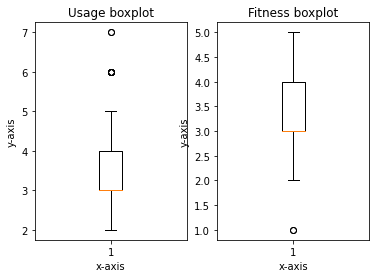

In [16]:
plt.subplot(1,2,1)
plt.boxplot(cardgood["Usage"])
plt.title("Usage boxplot")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.subplot(1,2,2)
plt.boxplot(cardgood["Fitness"])
plt.title("Fitness boxplot")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

Observation

- Because of their short scale Fitness and Usage do not have considerable outliers in their values.
- However, all the other columns with numeric values have outliers that might have influenced the output we have seen above, and the one we might see in subsequent sections.
- There is also a noticeable skewness in the some of the columns. More on this below.

One can also visualize the above output in the form of histograms.

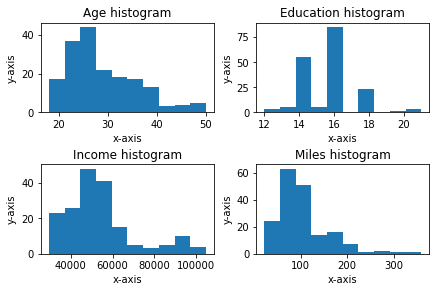

In [17]:
plt.subplot(2,2,1)              #indicates the shape shape of the subplots. 2 rows and 2 columns in this case.
plt.hist(cardgood["Age"])
plt.title("Age histogram")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.subplot(2,2,2)
plt.hist(cardgood["Education"])
plt.title("Education histogram")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.subplot(2,2,3)
plt.hist(cardgood["Income"])
plt.title("Income histogram")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.subplot(2,2,4)
plt.hist(cardgood["Miles"])
plt.title("Miles histogram")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.tight_layout(pad=0.5) #specifies the spacing
plt.show()


Observations:
-   There is a skewness to the right with the age of the customers. The outliers are also deduceable from the histogram since we have people who are 50 years of age.
-   The same type of skewness and outliers can be observed with Income and Miles. 

II) Categorical values

One can use barplots to visualize the categorical values

In [18]:
#I am adapting the syntax shared in our MLS case study

def cat_percentage(plot, feature): #defining a function that calculates the percentage of each categorical value based on the count of the features in a column
    
    total = len(feature) # number of values in the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each value in the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # indicate the percantage of the bar


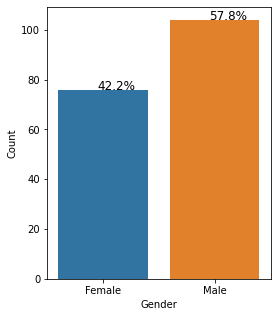

In [19]:


plt.figure(figsize=(4,5))
ax = sns.countplot(cardgood['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
cat_percentage(ax,cardgood['Gender'])




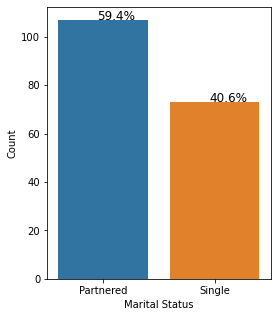

In [20]:
plt.figure(figsize=(4,5))
ax = sns.countplot(cardgood['MaritalStatus'])
plt.xlabel('Marital Status')
plt.ylabel('Count')
cat_percentage(ax,cardgood['MaritalStatus'])

Observations:
    
- These barplots give a visual representation of what was established during the calculations of the measures of central tendency.
- It was already evident that there were more males and more partnered individuals, but now one can see the percentage difference between the classes; 15.6% and 18.8% respectively.

# Checking the interaction between the variables

# a) BIVARIATE

I) AGE VS EDUCATION

In [21]:
cardgood.head(1)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112


In [22]:
a_g= ["Age", "Education"] #selects the columns to be investigated.
ag = cardgood[a_g].corr()
ag

,Age,Education
Age,1.000000,0.280496
Education,0.280496,1.000000


- Age and Education have a weak correlation, with a value of 0.280496. This result can be visualized with a heatmap as shown below.

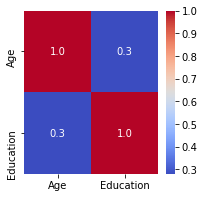

In [23]:
plt.figure(figsize=(3,3))
sns.heatmap(ag, annot=True,cmap='coolwarm',
        fmt=".1f",
        xticklabels=ag.columns,
        yticklabels=ag.columns)

II) AGE vs USAGE

In [24]:
a_u =["Age","Usage"]
au=cardgood[a_u].corr()
au

,Age,Usage
Age,1.000000,0.015064
Usage,0.015064,1.000000


Visualization of the correlation

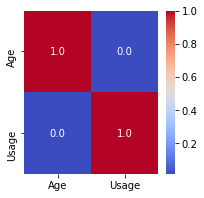

In [25]:
plt.figure(figsize=(3,3))
sns.heatmap(au, annot=True,cmap='coolwarm',
        fmt=".1f",
        xticklabels=au.columns,
        yticklabels=au.columns)

Observation:
- There is almost not correlation between the age of the customer and how often they plan on using the trendmills. The correlation value is 0.015064

III) AGE vs FITNESS

In [26]:
a_f = ["Age", "Fitness"]
af = cardgood[a_f].corr()
af

,Age,Fitness
Age,1.000000,0.061105
Fitness,0.061105,1.000000


Observation:
    - Like age and usage, there is a very weak correlation between age and fitness. The heatmap to be included later in this notebook with all the variables will illuminate this relationship

IV) AGE vs INCOME

In [27]:
a_i = ["Age","Income"]
ai=cardgood[a_i].corr()
ai


,Age,Income
Age,1.000000,0.513414
Income,0.513414,1.000000


Observation:
    - There is a moderate correlation between age and income with a correlation value of 0.513414. This result was expected since older people tend to have a larger income and vice versa.

V) AGE vs MILES

In [28]:
a_m = ["Age", "Miles"]
am = cardgood[a_m].corr()
am

,Age,Miles
Age,1.000000,0.036618
Miles,0.036618,1.000000


Observation:
- There is also no correlation between the age of the customer and the number of miles expected to run.


- At this point, one can infer that age does not reveal so much about the whole dataset.
- To get a better understanding of the correlation in the whole dataset, one can now do a multivariate analyses.

# b) Multivariate Analysis

In [29]:
# One can check the correlation of the whole dataset with the syntax below
cardgood.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


To visualize the correlations, one can use a heatmap

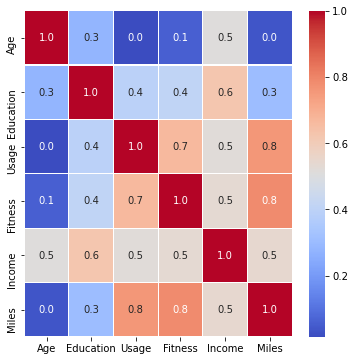

In [30]:
fig,ax = plt.subplots(figsize=(6, 6))   
sns.heatmap(cardgood.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.1f',cmap="coolwarm") # the color intensity is based on 
plt.show()

Observations:

- As it is expected, correlation of a variable against itself is 1, and that is indicated by the hot diagonal line.
- It can be observes that there is a strong correlation between the fitness level and expected miles, and the between usage and the expected miles, with a value of 0.8. There is also a strong correlation between usage and the fitness level with a correlation of 0.7.
- Moderate correlation can be observed between education and income as one would normally expect, with a correlation of 0.6. Similar correlation can be observed between income and age (as we saw earlier), income and usage, income and fitness, and income and miles, with a value of 0.5.
- The other correlation values are not strong.


The above correlations can also be visualized using pairwise plots as shown below.

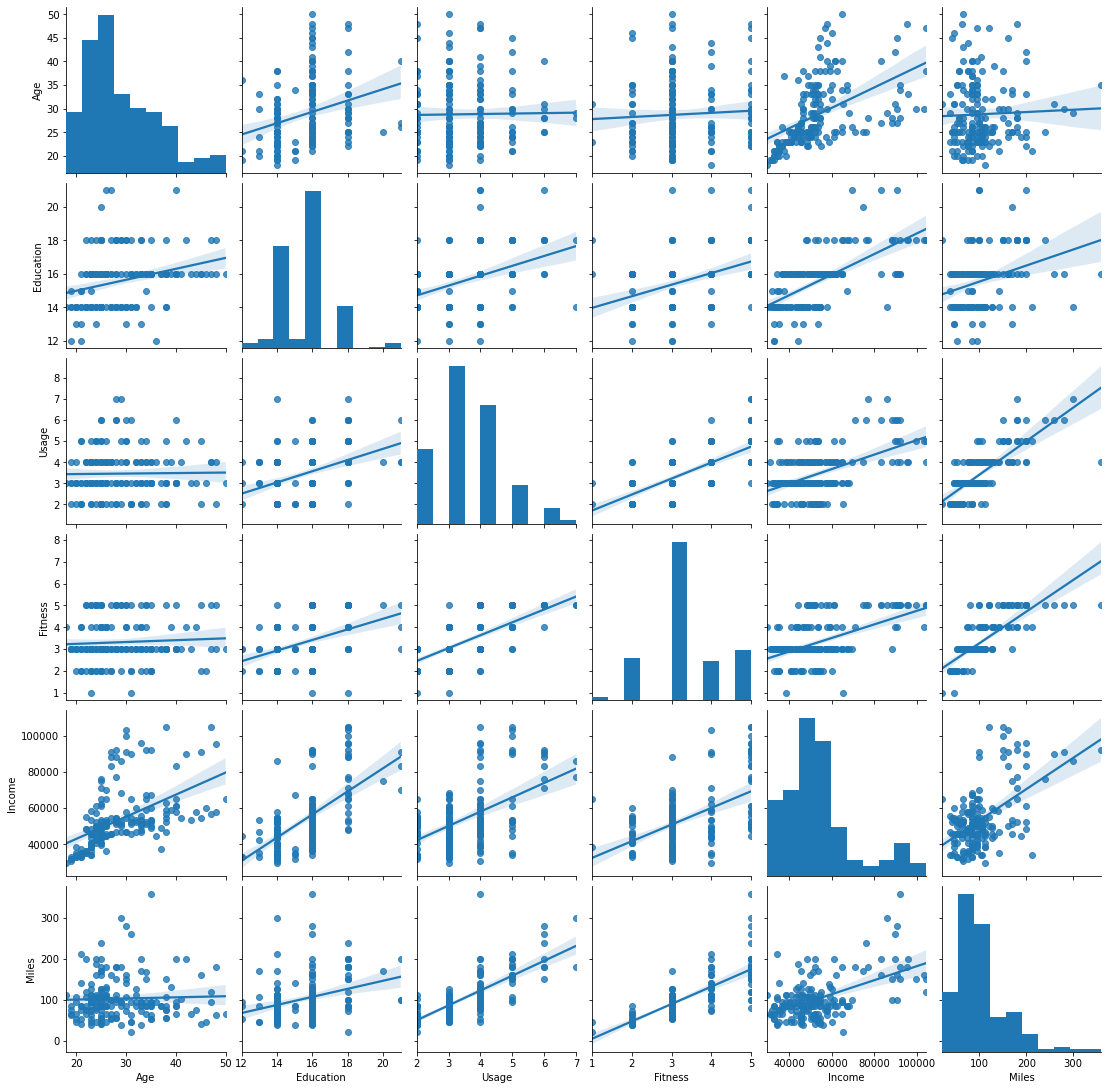

In [31]:
sns.pairplot(cardgood, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()

- The diagnal lines in the pairwise plots represent the correlation visually. 
- The scatter plots show the distribution of the various datapoints.

One can also check the covariance between the variables using the code below.

In [32]:
cardgood.corr()  # prints the correlation coefficient between every pair of attributes

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


# Group characteristics

INVESTIGATING ATTRIBUTES OF SOME OF THE COLUMNS

In [33]:
cardgood.head(1)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112


N0. of Products

In [34]:
cardgood["Product"].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

Age groups

In [35]:
cardgood["Age"].value_counts()

25    25
23    18
26    12
24    12
28     9
33     8
35     8
30     7
38     7
22     7
21     7
27     7
34     6
31     6
29     6
40     5
20     5
32     4
19     4
37     2
45     2
48     2
47     2
50     1
36     1
39     1
41     1
42     1
43     1
44     1
46     1
18     1
Name: Age, dtype: int64

No. of men vs women

In [36]:
cardgood["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

single vs partnered


In [37]:
cardgood["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

Level of education

In [38]:
cardgood["Education"].value_counts()

16    85
14    55
18    23
15     5
13     5
21     3
12     3
20     1
Name: Education, dtype: int64

In [39]:
cardgood["Income"].value_counts()

45480    14
52302     9
53439     8
54576     8
46617     8
         ..
58516     1
85906     1
29562     1
68220     1
54781     1
Name: Income, Length: 62, dtype: int64

# Insights and Recommendations


Products vs Education

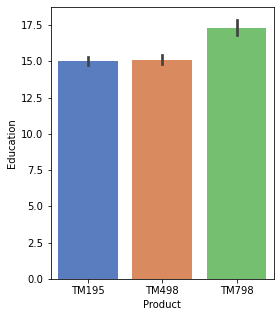

In [40]:
plt.figure(figsize=(4,5))  # setting the figure size
ax = sns.barplot(x='Product', y='Education', data=cardgood, palette='muted')  # barplot for products based on education

- This barplot indicates that model TM798 is preferred more by people who have received more education. 
- According to analysis up to this point, the mean number of years of education is 15.6, which a majority of the customers having 14-18 years of education. Therefore, the customer needs to make sure that this model is always available. The other two models need to be improved too so they too can be attractive to everyone. The other two models can also be offered with competitive prices to increase their sales.


Gender vs Usage

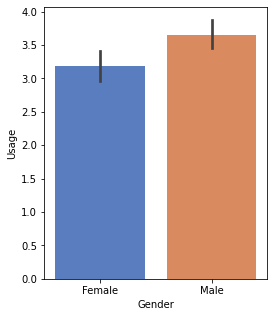

In [41]:
plt.figure(figsize=(4,5))  # setting the figure size
ax = sns.barplot(x='Gender', y='Usage', data=cardgood, palette='muted')

- This barplot indicates that more men than women intend to use these products. 
- To increase sales, advertisements should make sure they are attractive to men, while at the same time making women included, so that they too can want to use the products. 


Gender vs Fitness

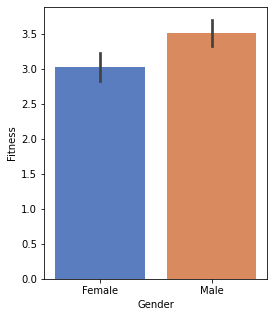

In [42]:
plt.figure(figsize=(4,5))  # setting the figure size
ax = sns.barplot(x='Gender', y='Fitness', data=cardgood, palette='muted')

- More men than women reported that they are fit.
- It is therefore, important to emphasis that these product will help improve or maintain the mens' fitness levels.
- It is also important to remember that there are more men than women in this dataset. So, the men should a little bit more attention than other demographics.

Gender vs Miles

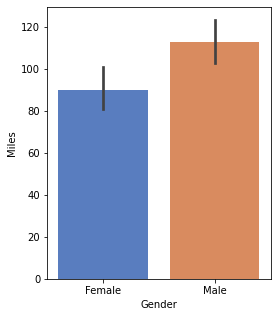

In [43]:
plt.figure(figsize=(4,5))  # setting the figure size
ax = sns.barplot(x='Gender', y='Miles', data=cardgood, palette='muted')

- Closely related to the fitness levels, this barplot reveals that men expect to use these products more. This finding further supports the idea of targetting men, who are showing more interest. 


Gender vs Income

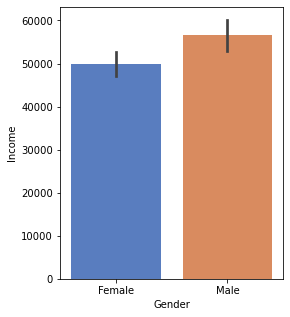

In [44]:
plt.figure(figsize=(4,5))  # setting the figure size
ax = sns.barplot(x='Gender', y='Income', data=cardgood, palette='muted')

- This graphic further supports the need to target men. It shows that they are the ones that are making more money. The company needs to make sure that the men are spending some of their money on the company's products.

Marital status vs income

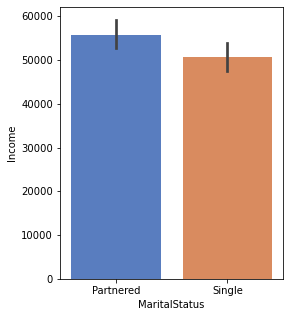

In [45]:
plt.figure(figsize=(4,5))  # setting the figure size
ax = sns.barplot(x='MaritalStatus', y='Income', data=cardgood, palette='muted')

- This plot provides additional information on the customers in the form of their marital status. There are more partnered customers than there are single ones. The partnered ones are the one with more income. They should, therefore, be targeted for product sales. 


Marital status vs miles

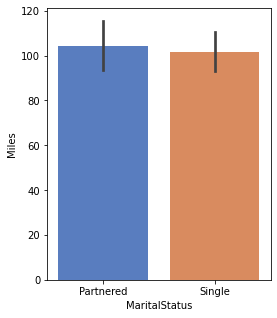

In [46]:

plt.figure(figsize=(4,5))  # setting the figure size
ax = sns.barplot(x='MaritalStatus', y='Miles', data=cardgood, palette='muted')



Marital status vs Usage


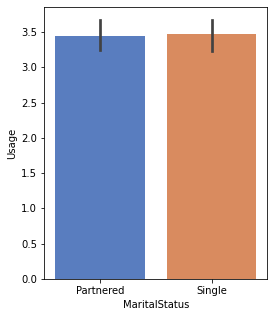

In [47]:
plt.figure(figsize=(4,5))  # setting the figure size
ax = sns.barplot(x='MaritalStatus', y='Usage', data=cardgood, palette='muted')

- The graphics above indicate that both single and partnered customers plan on using products a relatively similar amount of time. That hints at equal interest both types of customers. Therefore, they should all be targetted equally.


# Conclusion

Even though there are customers that indicate more interest than the other, efforts should be made to maintain the old customers, while converting the other ones to new customers by capturing their interests.


Below is a summary of some of the analysis done on the dataset

In [48]:
!pip install pandas-profiling==2.8.0

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27090 sha256=37e3ab30539fcefdff40a4612efe6caafcc81aef5baa322291be79d177e1c02f
  Stored in directory: c:\users\teddy\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for phik: filename=phik-0.11.2-py3-none-any.whl size=1107421 sha256=eeaf417577b37801a9542191f86904d3314a3b58f86a968825fe76b9634826ad
  Stored in directory: c:\users\teddy\appdata\local\pip\cache\wheels\72\9a\23\097c93fd8341220d92674891b6a9a30f0e389719d9b7291bd2
Successfully built htmlmin phik


ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.5.0 which is incompatible.


In [49]:
from pandas_profiling import ProfileReport # to view report created by pandas profile
profile = ProfileReport(data)

profile